# Predicting Drought using Weather and Soil data

## Importing the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
import warnings
warnings.simplefilter('ignore')

## Gathering & Understanding the data

In [3]:
soil =pd.read_csv("soil_data.csv")

In [4]:
soil.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [5]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

In [6]:
# Checking for null values in the soil data
soil.isnull().sum()

fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
dtype: int64

In [7]:
train=pd.read_csv("train_timeseries.csv")

In [8]:
train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [10]:
# Checking for NUll values in the train data
train.isnull().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [11]:
test=pd.read_csv("test_timeseries.csv")

In [12]:
test.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


## Processing data in batches

In [13]:
# Removing the null values in the target variable as the drought score is only available for once in 7 days.
# Processing data in batches
skipRows = 2000000
nRows = 2000000
train = pd.read_csv('train_timeseries.csv', nrows=2000000)
train = train.dropna()
print('here' , train.shape)
while True: 
    try:
        dfi = pd.read_csv('train_timeseries.csv', skiprows=skipRows, nrows=nRows, header=None)
        dfi.columns = train.columns
        dfi = dfi.dropna()
        print(dfi.shape)
        train = pd.concat([train, dfi], axis=0,ignore_index=False )
        print(train.shape)
        skipRows += nRows
    except:
        print('Finished processing')
        break;

here (285668, 21)
(285668, 21)
(571336, 21)
(285669, 21)
(857005, 21)
(285668, 21)
(1142673, 21)
(285668, 21)
(1428341, 21)
(285669, 21)
(1714010, 21)
(285668, 21)
(1999678, 21)
(285668, 21)
(2285346, 21)
(285668, 21)
(2571014, 21)
(185782, 21)
(2756796, 21)
Finished processing


In [14]:
train.score.unique()

array([1.    , 2.    , 1.4905, ..., 2.8057, 0.7399, 0.606 ])

In [15]:
# Converting the target variables having continuous values to discrete values.
a = np.array(train['score'])
train['score']= np.ceil(a)

In [17]:
#Range of target values.
train.score.unique()

array([1., 2., 3., 4., 5., 0.])

In [18]:
train['score']

3          1.0
10         2.0
17         2.0
24         2.0
31         1.0
          ... 
1300648    0.0
1300655    0.0
1300662    0.0
1300669    0.0
1300676    0.0
Name: score, Length: 2756796, dtype: float64

In [19]:
train.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

## Data Exploration

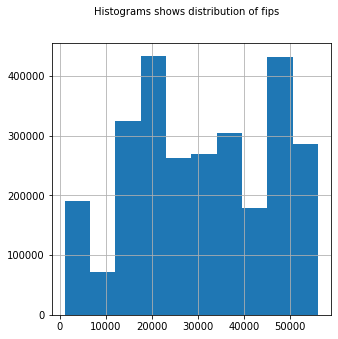

In [20]:
# FIPS data distribution
train['fips'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of fips', fontsize=10);

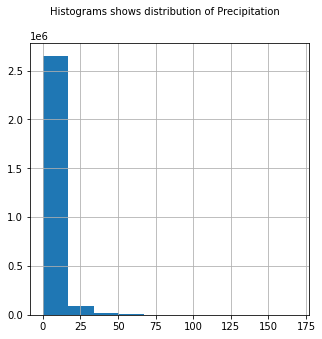

In [21]:
# Plot for PRECTOT -> Precipitation (mm day-1)
train['PRECTOT'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Precipitation', fontsize=10);

In [22]:
# Precipitation (mm day-1)
# sns.set(rc={'figure.figsize':(10,15)})
# sns.histplot(data=df, x='PRECTOT', stat='count', hue='score', multiple='stack', axis =1)
train.groupby(['PRECTOT', 'score'])[['score']].count()

score
PRECTOT score        
0.00    0.0    351162
        1.0    143476
        2.0     95203
        3.0     70293
        4.0     43621
...               ...
152.83  0.0         3
153.67  0.0         1
161.83  0.0         1
165.51  0.0         1
168.69  0.0         1

[24321 rows x 1 columns]

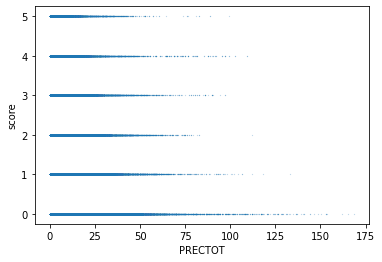

In [23]:
# Precipitation value with respect to target variable score
ax2 = train.plot.scatter(x='PRECTOT', y='score', colormap='viridis', s= 0.01)

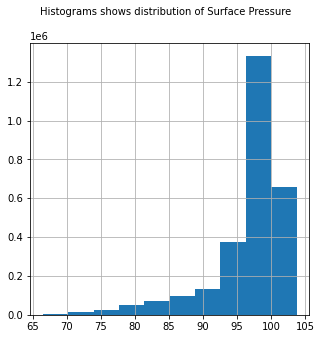

In [24]:
#  Plot for PS -> Surface Pressure (kPa)
train['PS'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Surface Pressure', fontsize=10);
# plt.text(75, 0.8e7, 'PS', fontsize = 12)

In [25]:
# Surface Pressure (kPa)
# sns.histplot(data=df, x='PS', stat='count', hue='score', multiple='stack')
train.groupby(['PS', 'score'])[['score']].count()

,,score
PS,score,
66.49,0.0,1
66.93,1.0,1
66.95,1.0,1
66.97,4.0,1
66.98,1.0,1
...,...,...
103.71,0.0,1
103.72,1.0,1
103.74,0.0,1


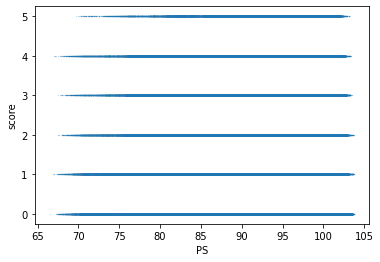

In [26]:
# Surface pressure with respect to the target variable
ax2 = train.plot.scatter(x='PS', y='score', colormap='viridis', s= 0.01)

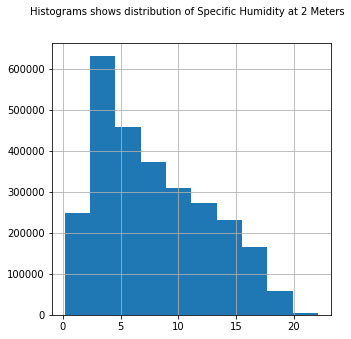

In [27]:
# Plot for QV2M -> Specific Humidity at 2 Meters (g/kg)
train['QV2M'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Specific Humidity at 2 Meters', fontsize=10);
# plt.text(15, 4e6, 'QV2M', fontsize = 12)

In [28]:
# Specific Humidity at 2 Meters (g/kg)
# sns.histplot(data=df, x='QV2M', stat='count', hue='score', multiple='stack')
train.groupby(['QV2M', 'score'])[['score']].count()

,,score
QV2M,score,
0.14,0.0,1
0.15,1.0,1
0.16,1.0,3
0.17,1.0,1
0.18,1.0,2
...,...,...
21.91,0.0,4
21.92,0.0,2
21.95,0.0,2


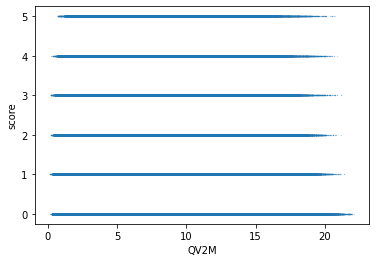

In [29]:
# Specific Humidity at 2 Meters (g/kg) with respect to the target variable
ax2 = train.plot.scatter(x='QV2M', y='score', colormap='viridis', s= 0.01)

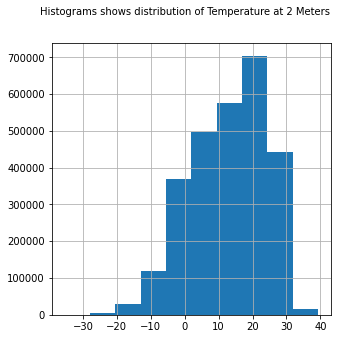

In [30]:
# Plot for T2M -> Temperature at 2 Meters (C)
train['T2M'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Temperature at 2 Meters ', fontsize=10);
# plt.text(-30, 4e6, 'T2M', fontsize = 12)

In [32]:
# sns.histplot(data=df, x='T2M', stat='count', hue='score', multiple='stack')
train.groupby(['T2M', 'score'])[['score']].count()

score
T2M    score       
-35.44 0.0        1
-34.63 1.0        1
-33.94 1.0        1
-33.48 1.0        1
-33.33 1.0        2
...             ...
 38.91 4.0        1
       5.0        1
 38.92 1.0        1
 38.93 1.0        1
 39.33 1.0        1

[33987 rows x 1 columns]

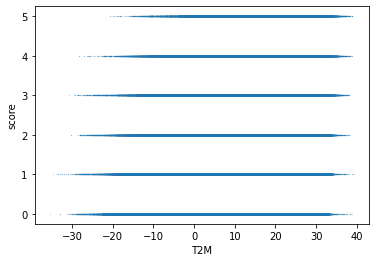

In [33]:
# Plot for T2M -> Temperature at 2 Meters (C) with respect to the target variable
ax2 = train.plot.scatter(x='T2M', y='score', colormap='viridis', s= 0.01)

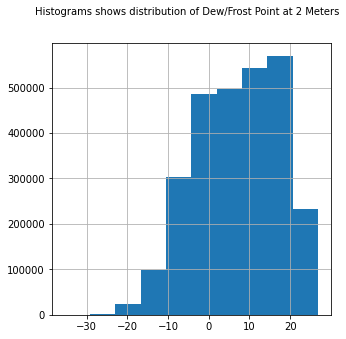

In [34]:
# Plot for T2MDEW -> Dew/Frost Point at 2 Meters (C)
train['T2MDEW'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Dew/Frost Point at 2 Meters', fontsize=10);
# plt.text(-30, 3.5e6, 'T2MDEW', fontsize = 12)

In [35]:
# sns.histplot(data=df, x='T2MDEW', stat='count', hue='score', multiple='stack')
train.groupby(['T2MDEW', 'score'])[['score']].count()

,,score
T2MDEW,score,
-35.44,0.0,1
-34.95,1.0,1
-34.21,1.0,1
-34.10,1.0,1
-33.98,1.0,2
...,...,...
26.39,0.0,4
26.48,0.0,3
26.49,0.0,2


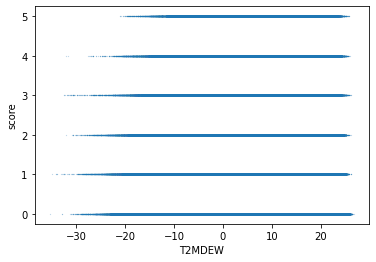

In [36]:
# T2MDEW -> Dew/Frost Point at 2 Meters (C) with respect to the target variable
ax2 = train.plot.scatter(x='T2MDEW', y='score', colormap='viridis', s= 0.01)

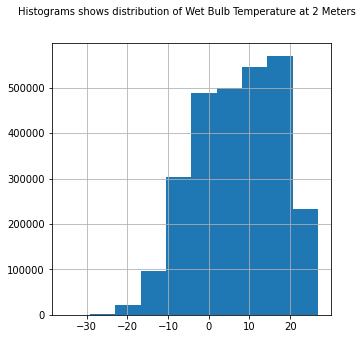

In [37]:
# Plot for T2MWET -> Wet Bulb Temperature at 2 Meters (C)
train['T2MWET'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wet Bulb Temperature at 2 Meters', fontsize=10);
# plt.text(-30, 3.5e6, 'T2MWET', fontsize = 12)

In [38]:
train.groupby(['T2MWET', 'score'])[['score']].count()

,,score
T2MWET,score,
-35.46,0.0,1
-34.75,1.0,1
-34.01,1.0,1
-33.77,1.0,1
-33.59,1.0,2
...,...,...
26.39,0.0,4
26.48,0.0,3
26.49,0.0,2


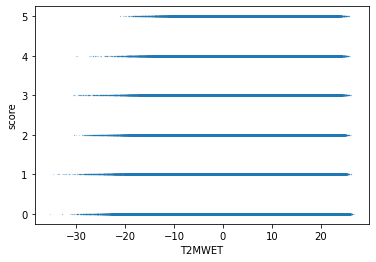

In [39]:
# Plot for T2MWET -> Wet Bulb Temperature at 2 Meters (C) with respect to the target variable
ax2 = train.plot.scatter(x='T2MWET', y='score', colormap='viridis', s= 0.01)

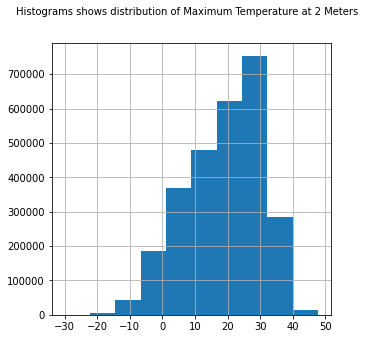

In [40]:
# Plot for T2M_MAX -> Maximum Temperature at 2 Meters (C)
train['T2M_MAX'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Maximum Temperature at 2 Meters', fontsize=10);
# plt.text(-20, 4e6, 'T2M_MAX', fontsize = 12)

In [41]:
# sns.histplot(data=df, x='T2M_MAX', stat='count', hue='score', multiple='stack')
train.groupby(['T2M_MAX', 'score'])[['score']].count()

,,score
T2M_MAX,score,
-30.03,0.0,1
-29.71,1.0,1
-29.06,1.0,2
-29.05,1.0,1
-28.68,1.0,1
...,...,...
46.72,1.0,1
47.16,1.0,1
47.27,0.0,1


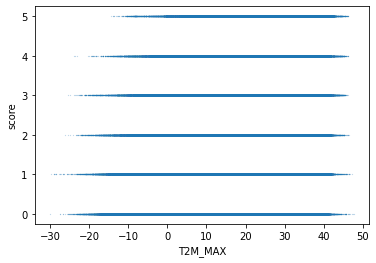

In [42]:
# Plot for T2M_MAX -> Maximum Temperature at 2 Meters (C) with respect to the target variable
ax2 = train.plot.scatter(x='T2M_MAX', y='score', colormap='viridis', s= 0.01)

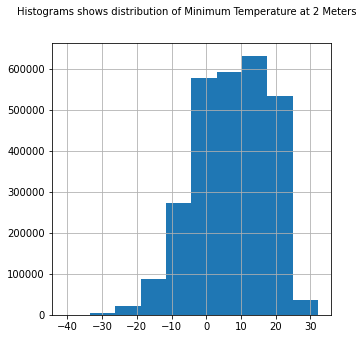

In [43]:
# Plot for T2M_MIN -> Minimum Temperature at 2 Meters (C)
train['T2M_MIN'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Minimum Temperature at 2 Meters', fontsize=10);
# plt.text(-40, 4e6, 'T2M_MIN', fontsize = 12)

In [44]:
train.groupby(['T2M_MIN', 'score'])[['score']].count()

,,score
T2M_MIN,score,
-40.85,1.0,1
-39.83,1.0,1
-39.77,0.0,1
-39.30,1.0,1
-39.27,0.0,1
...,...,...
32.03,2.0,1
32.09,1.0,1
32.14,0.0,1


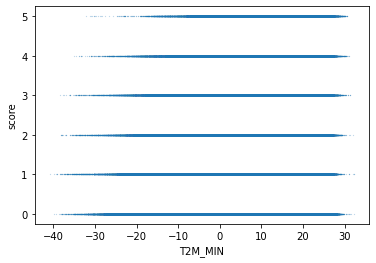

In [45]:
#Plot for T2M_MIN -> Minimum Temperature at 2 Meters (C) with respect to the target variable
ax2 = train.plot.scatter(x='T2M_MIN', y='score', colormap='viridis', s= 0.01)

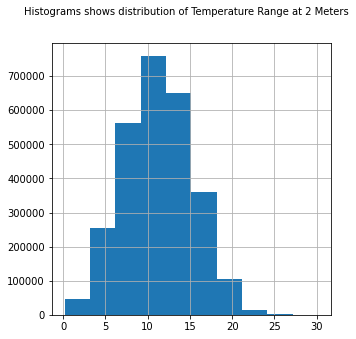

In [46]:
# Plot for T2M_RANGE -> Temperature Range at 2 Meters (C)
train['T2M_RANGE'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Temperature Range at 2 Meters', fontsize=10);
# plt.text(25, 5e6, 'T2M_RANGE', fontsize = 12)

In [47]:
train.groupby(['T2M_RANGE', 'score'])[['score']].count()

score
T2M_RANGE score       
0.16      0.0        1
          3.0        1
0.17      0.0        1
          2.0        1
0.21      1.0        1
...                ...
29.88     4.0        1
29.99     3.0        1
30.13     3.0        1
          4.0        1
30.17     4.0        1

[14929 rows x 1 columns]

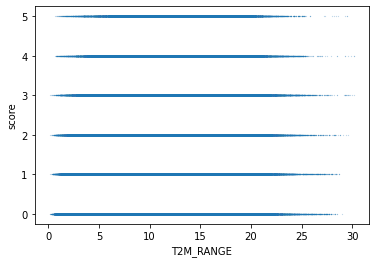

In [48]:
# Plot for T2M_RANGE -> Temperature Range at 2 Meters (C) with respect to the target variable
ax2 = train.plot.scatter(x='T2M_RANGE', y='score', colormap='viridis', s= 0.01)

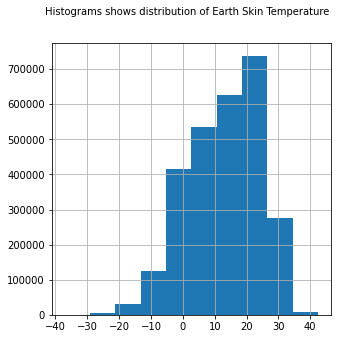

In [49]:
# Plot for TS -> Earth Skin Temperature (C)
train['TS'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Earth Skin Temperature', fontsize=10);
# plt.text(-30, 4e6, 'TS', fontsize = 12)

In [50]:
train.groupby(['TS', 'score'])[['score']].count()

,,score
TS,score,
-37.16,0.0,1
-36.18,1.0,1
-35.24,1.0,1
-34.78,0.0,1
-34.76,1.0,1
...,...,...
41.86,3.0,1
41.89,0.0,1
41.91,1.0,1


In [51]:
train = train[train['TS']>30]

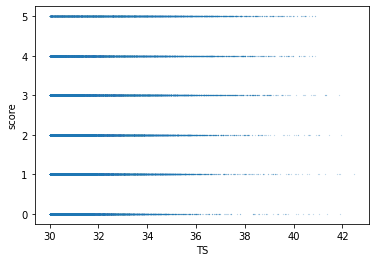

In [52]:
# Plot for TS -> Earth Skin Temperature (C) with respect to the target variable
ax2 = train.plot.scatter(x='TS', y='score', colormap='viridis', s= 0.01)

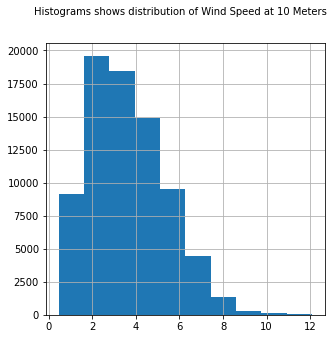

In [53]:
# Plot for WS10M -> Wind Speed at 10 Meters (m/s)
train['WS10M'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wind Speed at 10 Meters', fontsize=10);
# plt.text(16, 7e6, 'WS10M', fontsize = 12)

In [54]:
train.groupby(['WS10M', 'score'])[['score']].count()

score
WS10M score       
0.45  1.0        1
0.46  0.0        2
      3.0        2
0.50  2.0        1
      3.0        1
...            ...
11.67 3.0        1
11.76 3.0        2
11.85 3.0        1
11.99 3.0        1
12.09 3.0        1

[4909 rows x 1 columns]

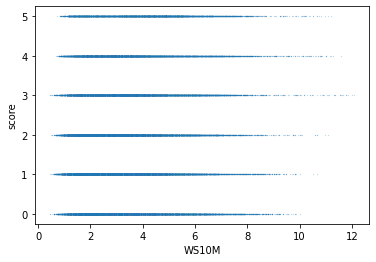

In [55]:
# Plot for TS -> Earth Skin Temperature (C) with respect to the target variable
ax2 = train.plot.scatter(x='WS10M', y='score', colormap='viridis', s= 0.01)

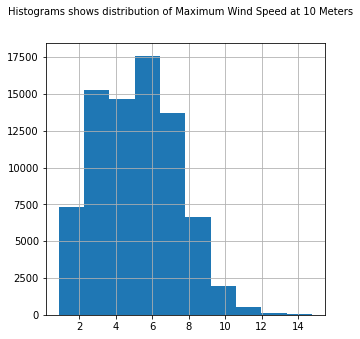

In [56]:
# Plot for WS10M_MAX -> Maximum Wind Speed at 10 Meters (m/s)
train['WS10M_MAX'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Maximum Wind Speed at 10 Meters', fontsize=10);
# plt.text(25, 7e6, 'WS10M_MAX', fontsize = 12)

In [57]:
train.groupby(['WS10M_MAX', 'score'])[['score']].count()

,,score
WS10M_MAX,score,
0.86,0.0,1
0.89,0.0,2
0.92,3.0,2
0.93,1.0,1
0.96,2.0,1
...,...,...
14.21,4.0,1
14.26,3.0,1
14.37,3.0,2


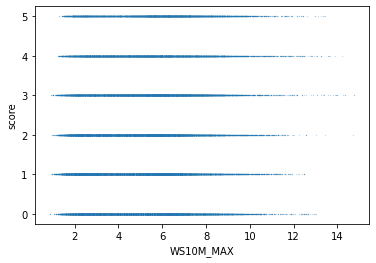

In [58]:
# Plot for WS10M_MAX -> Maximum Wind Speed at 10 Meters (m/s) with respect to the target variable
ax2 = train.plot.scatter(x='WS10M_MAX', y='score', colormap='viridis', s= 0.01)

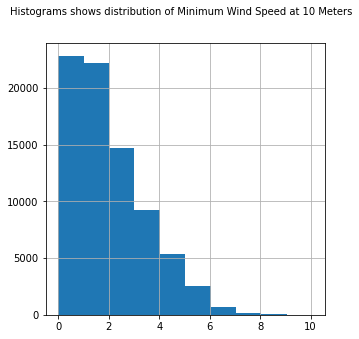

In [59]:
# Plot for WS10M_MIN -> Minimum Wind Speed at 10 Meters (m/s)
train['WS10M_MIN'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Minimum Wind Speed at 10 Meters', fontsize=10);
# plt.text(12.5, 0.8e7, 'WS10M_MIN', fontsize = 12)

In [60]:
train.groupby(['WS10M_MIN', 'score'])[['score']].count()

score
WS10M_MIN score       
0.00      2.0        2
          4.0        3
0.01      0.0        2
          2.0        3
          3.0        6
...                ...
9.56      3.0        1
9.67      4.0        1
9.75      3.0        1
10.00     3.0        2
10.06     4.0        1

[4203 rows x 1 columns]

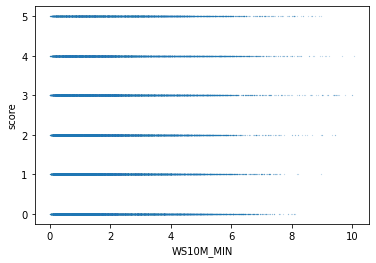

In [61]:
# Plot for WS10M_MIN -> Minimum Wind Speed at 10 Meters (m/s)  with respect to the target variable
ax2 = train.plot.scatter(x='WS10M_MIN', y='score', colormap='viridis', s= 0.01)

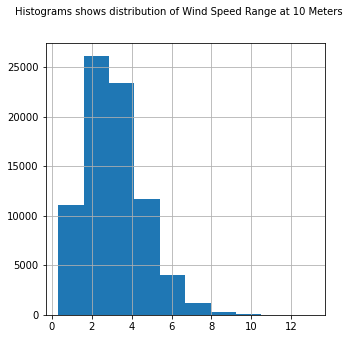

In [62]:
# Plot for WS10M_RANGE -> Wind Speed Range at 10 Meters (m/s)
train['WS10M_RANGE'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wind Speed Range at 10 Meters ', fontsize=10);
# plt.text(19, 0.8e7, 'WS10M_RANGE', fontsize = 12)

In [63]:
train.groupby(['WS10M_RANGE', 'score'])[['WS10M_RANGE']].count()

WS10M_RANGE
WS10M_RANGE score             
0.34        2.0              2
0.38        0.0              1
0.39        1.0              2
0.43        0.0              1
            3.0              1
...                        ...
11.68       4.0              1
12.03       0.0              1
12.06       0.0              1
12.38       0.0              1
13.03       4.0              1

[4525 rows x 1 columns]

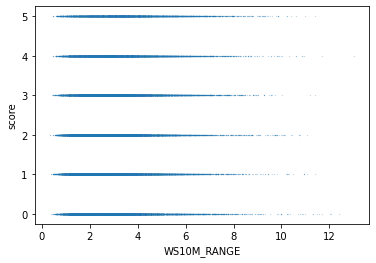

In [64]:
## Plot for WS10M_RANGE -> Wind Speed Range at 10 Meters (m/s) with respect to the target variable
ax2 = train.plot.scatter(x='WS10M_RANGE', y='score', colormap='viridis', s= 0.01 )

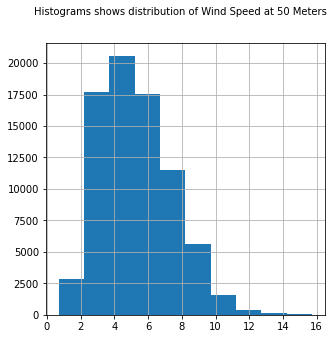

In [65]:
# Plot for WS50M -> Wind Speed at 50 Meters (m/s)
train['WS50M'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wind Speed at 50 Meters', fontsize=10);
# plt.text(23, 0.8e7, 'WS50M', fontsize = 12)

In [66]:
train.groupby(['WS50M', 'score'])[['score']].count()

score
WS50M score       
0.69  1.0        1
      3.0        2
0.76  1.0        1
      2.0        1
0.78  0.0        2
...            ...
15.22 3.0        2
15.27 3.0        1
15.33 3.0        1
15.63 3.0        1
15.73 3.0        1

[6092 rows x 1 columns]

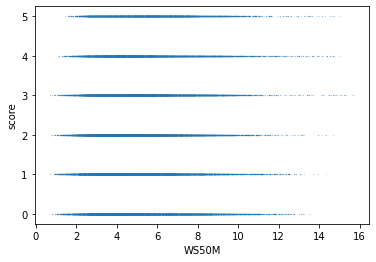

In [67]:
# Plot for WS50M -> Wind Speed at 50 Meters (m/s) with respect to the target variable
ax2 = train.plot.scatter(x='WS50M', y='score', colormap='viridis', s= 0.01)

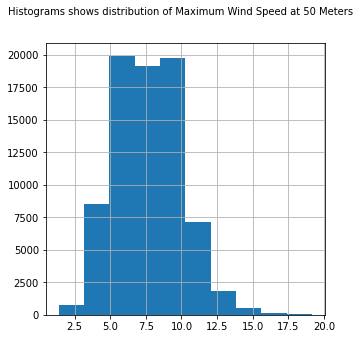

In [68]:
# Plot for WS50M_MAX -> Maximum Wind Speed at 50 Meters (m/s)
train['WS50M_MAX'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Maximum Wind Speed at 50 Meters', fontsize=10);
# plt.text(30, 1.0e7, 'WS50M_MAX', fontsize = 12)

In [70]:
train.groupby(['WS50M_MAX', 'score'])[['score']].count()

score
WS50M_MAX score       
1.36      1.0        2
          2.0        1
1.38      0.0        1
1.39      3.0        2
1.44      3.0        2
...                ...
18.57     3.0        1
18.62     3.0        1
18.77     3.0        2
19.16     2.0        1
19.18     3.0        2

[6907 rows x 1 columns]

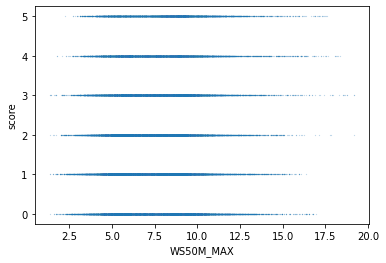

In [71]:
# Plot for WS50M_MAX -> Maximum Wind Speed at 50 Meters (m/s) with respect to target variable
ax2 = train.plot.scatter(x='WS50M_MAX', y='score', colormap='viridis', s= 0.01)

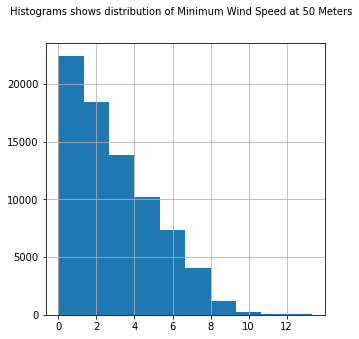

In [72]:
# Plot for WS50M_MIN -> Minimum Wind Speed at 50 Meters (m/s)
train['WS50M_MIN'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Minimum Wind Speed at 50 Meters', fontsize=10);
# plt.text(15, 6e6, 'WS50M_MIN', fontsize = 12)

In [73]:
train.groupby(['WS50M_MIN', 'score'])[['score']].count()

score
WS50M_MIN score       
0.00      0.0        4
          4.0        1
0.01      0.0        9
          1.0        1
          2.0        2
...                ...
12.94     3.0        2
          4.0        1
12.96     3.0        1
13.25     2.0        1
13.33     4.0        1

[5627 rows x 1 columns]

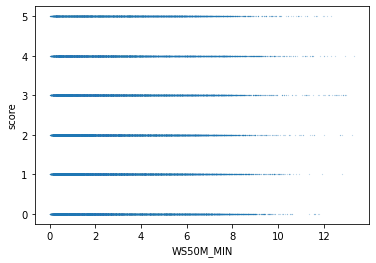

In [74]:
# Plot for WS50M_MIN -> Minimum Wind Speed at 50 Meters (m/s) with respect to the target variable
ax2 = train.plot.scatter(x='WS50M_MIN', y='score', colormap='viridis', s= 0.01)

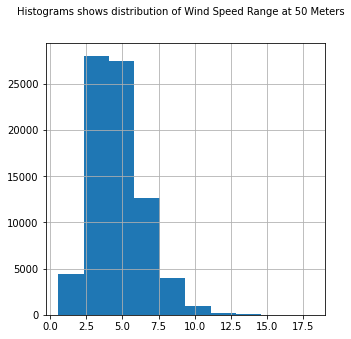

In [75]:
# Plot for WS50M_RANGE -> Wind Speed Range at 50 Meters (m/s)
train['WS50M_RANGE'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wind Speed Range at 50 Meters', fontsize=10);
# plt.text(20, 0.8e7, 'WS50M_RANGE', fontsize = 12)

In [76]:
train.groupby(['WS50M_RANGE', 'score'])[['score']].count()

score
WS50M_RANGE score       
0.58        1.0        1
0.71        1.0        1
0.86        4.0        2
0.88        3.0        2
            4.0        2
...                  ...
15.63       4.0        1
15.78       1.0        1
            5.0        1
16.57       0.0        1
18.09       4.0        1

[5544 rows x 1 columns]

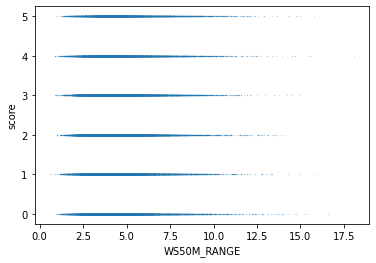

In [77]:
# Plot for WS50M_RANGE -> Wind Speed Range at 50 Meters (m/s) with respect to the target variable
ax2 = train.plot.scatter(x='WS50M_RANGE', y='score', colormap='viridis', s= 0.01)

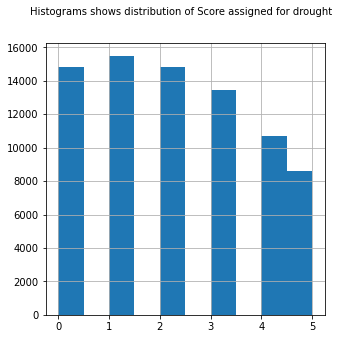

In [78]:
# Plot for score -> Score assigned for drought
train['score'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Score assigned for drought', fontsize=10);
# plt.text(4.2, 1.4e6, 'score', fontsize = 12)

In [79]:
train['date']= pd.to_datetime(train['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77877 entries, 185 to 1297232
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fips         77877 non-null  int64         
 1   date         77877 non-null  datetime64[ns]
 2   PRECTOT      77877 non-null  float64       
 3   PS           77877 non-null  float64       
 4   QV2M         77877 non-null  float64       
 5   T2M          77877 non-null  float64       
 6   T2MDEW       77877 non-null  float64       
 7   T2MWET       77877 non-null  float64       
 8   T2M_MAX      77877 non-null  float64       
 9   T2M_MIN      77877 non-null  float64       
 10  T2M_RANGE    77877 non-null  float64       
 11  TS           77877 non-null  float64       
 12  WS10M        77877 non-null  float64       
 13  WS10M_MAX    77877 non-null  float64       
 14  WS10M_MIN    77877 non-null  float64       
 15  WS10M_RANGE  77877 non-null  float64       
 16  

In [80]:
train['date']
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['week'] = train['date'].dt.week
train['day'] = train['date'].dt.day
train

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,week,day
185,1001,2000-07-04,0.03,100.31,12.93,29.71,17.93,17.93,37.55,22.42,...,1.30,2.96,4.96,1.59,3.36,3.0,2000,7,27,4
192,1001,2000-07-11,0.30,99.99,15.87,31.10,21.19,21.18,37.89,24.80,...,1.85,3.77,4.96,1.64,3.32,4.0,2000,7,28,11
199,1001,2000-07-18,0.00,100.14,10.51,30.31,14.53,14.53,38.94,20.00,...,1.99,3.82,5.32,1.49,3.82,5.0,2000,7,29,18
241,1001,2000-08-29,0.01,99.82,13.64,31.07,18.78,18.78,39.23,24.55,...,1.46,4.77,6.11,2.82,3.29,5.0,2000,8,35,29
2376,1001,2006-07-04,1.80,100.25,14.41,30.29,19.66,19.66,36.67,22.74,...,0.90,2.37,4.16,1.34,2.82,2.0,2006,7,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295055,56043,2001-08-07,0.41,83.52,9.58,28.39,10.51,10.51,35.80,21.12,...,4.12,4.58,6.32,0.78,5.55,4.0,2001,8,32,7
1295398,56043,2002-07-16,0.89,83.15,9.28,28.02,9.58,9.58,36.86,18.96,...,4.25,3.72,7.08,0.94,6.14,4.0,2002,7,29,16
1295790,56043,2003-08-12,0.02,83.25,8.32,28.63,8.38,8.38,37.07,20.51,...,2.99,3.52,6.94,1.74,5.19,4.0,2003,8,33,12
1296861,56043,2006-07-18,0.20,83.18,6.24,28.89,4.09,4.09,38.18,19.54,...,2.68,5.60,9.11,3.19,5.92,2.0,2006,7,29,18


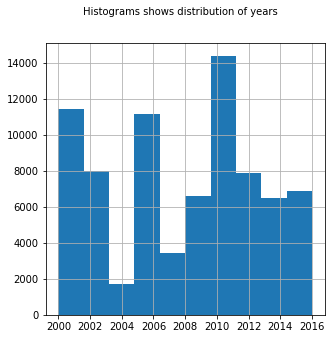

In [81]:
# Distribution of data according to the year. Data from 2000 to 2016 is been used
train['year'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of years', fontsize=10);

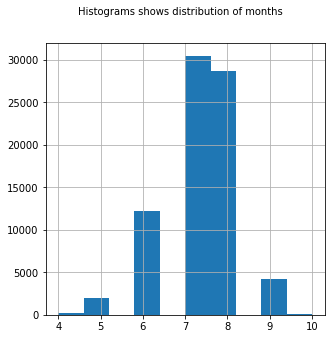

In [82]:
# Distribution of data according to month
train['month'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of months', fontsize=10);

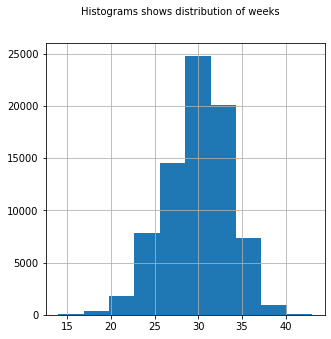

In [83]:
# Distribution of data according to week
train['week'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of weeks', fontsize=10);

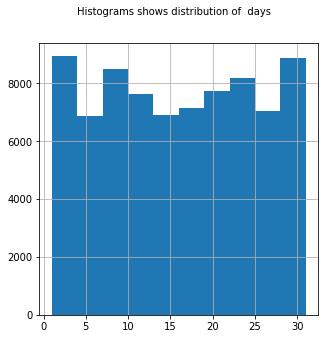

In [84]:
# Distribution of data according to day
train['day'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of  days', fontsize=10);

In [85]:
# Correlation matrix plot
corealtion_matrix = train.corr()
corealtion_matrix

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,week,day
fips,1.000000,-0.057942,-0.104166,0.036827,-0.035788,0.056190,0.055890,-0.076970,0.036424,-0.085247,...,0.222233,0.324720,0.335203,0.262578,0.116800,0.004172,0.008911,-0.046321,-0.037325,0.016032
PRECTOT,-0.057942,1.000000,0.086157,0.262928,-0.111960,0.223812,0.224008,-0.221066,0.132294,-0.264215,...,-0.015629,-0.143694,-0.128286,-0.141102,0.005543,-0.015064,0.016803,0.000144,0.007337,0.029887
PS,-0.104166,0.086157,1.000000,0.683033,0.138355,0.730546,0.731083,-0.127037,0.477353,-0.433047,...,-0.451051,-0.369270,-0.489322,-0.185282,-0.415434,-0.061491,0.037325,0.121151,0.121039,-0.003542
QV2M,0.036827,0.262928,0.683033,1.000000,-0.094610,0.979268,0.979593,-0.448385,0.497852,-0.696744,...,-0.363421,-0.268089,-0.381605,-0.107874,-0.369291,-0.204978,0.124962,0.143646,0.135767,-0.026158
T2M,-0.035788,-0.111960,0.138355,-0.094610,1.000000,-0.040505,-0.040935,0.787714,0.631722,0.168563,...,0.014287,0.046501,0.049805,0.021359,0.039190,0.172245,0.035938,0.134541,0.136626,0.012751
T2MDEW,0.056190,0.223812,0.730546,0.979268,-0.040505,1.000000,0.999995,-0.389230,0.507582,-0.657662,...,-0.375674,-0.249093,-0.366386,-0.088385,-0.373345,-0.176855,0.104133,0.160228,0.155294,-0.020766
T2MWET,0.055890,0.224008,0.731083,0.979593,-0.040935,0.999995,1.000000,-0.389784,0.507628,-0.658124,...,-0.375998,-0.249581,-0.366971,-0.088709,-0.373715,-0.176997,0.104280,0.160110,0.155157,-0.020805
T2M_MAX,-0.076970,-0.221066,-0.127037,-0.448385,0.787714,-0.389230,-0.389784,1.000000,0.085521,0.715986,...,0.121503,0.125185,0.197087,0.031167,0.221076,0.176568,-0.019337,0.014984,0.015771,0.009680
T2M_MIN,0.036424,0.132294,0.477353,0.497852,0.631722,0.507582,0.507628,0.085521,1.000000,-0.634323,...,-0.114910,-0.064228,-0.156804,0.015872,-0.226207,0.045800,0.094599,0.248104,0.257326,0.017508
T2M_RANGE,-0.085247,-0.264215,-0.433047,-0.696744,0.168563,-0.657662,-0.658124,0.715986,-0.634323,1.000000,...,0.174784,0.142129,0.262784,0.013054,0.330034,0.104916,-0.081292,-0.162223,-0.168076,-0.004762


In [86]:
corealtion_matrix.style.background_gradient(cmap='coolwarm')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,week,day
fips,1.000000,-0.057942,-0.104166,0.036827,-0.035788,0.056190,0.055890,-0.076970,0.036424,-0.085247,0.109544,0.351739,0.346802,0.291494,0.222233,0.324720,0.335203,0.262578,0.116800,0.004172,0.008911,-0.046321,-0.037325,0.016032
PRECTOT,-0.057942,1.000000,0.086157,0.262928,-0.111960,0.223812,0.224008,-0.221066,0.132294,-0.264215,-0.166011,-0.132543,-0.109413,-0.145477,-0.015629,-0.143694,-0.128286,-0.141102,0.005543,-0.015064,0.016803,0.000144,0.007337,0.029887
PS,-0.104166,0.086157,1.000000,0.683033,0.138355,0.730546,0.731083,-0.127037,0.477353,-0.433047,-0.078597,-0.384509,-0.461919,-0.236007,-0.451051,-0.369270,-0.489322,-0.185282,-0.415434,-0.061491,0.037325,0.121151,0.121039,-0.003542
QV2M,0.036827,0.262928,0.683033,1.000000,-0.094610,0.979268,0.979593,-0.448385,0.497852,-0.696744,-0.283952,-0.268419,-0.341642,-0.145290,-0.363421,-0.268089,-0.381605,-0.107874,-0.369291,-0.204978,0.124962,0.143646,0.135767,-0.026158
T2M,-0.035788,-0.111960,0.138355,-0.094610,1.000000,-0.040505,-0.040935,0.787714,0.631722,0.168563,0.894569,0.030629,0.025467,0.023400,0.014287,0.046501,0.049805,0.021359,0.039190,0.172245,0.035938,0.134541,0.136626,0.012751
T2MDEW,0.056190,0.223812,0.730546,0.979268,-0.040505,1.000000,0.999995,-0.389230,0.507582,-0.657662,-0.231240,-0.256550,-0.337709,-0.127478,-0.375674,-0.249093,-0.366386,-0.088385,-0.373345,-0.176855,0.104133,0.160228,0.155294,-0.020766
T2MWET,0.055890,0.224008,0.731083,0.979593,-0.040935,0.999995,1.000000,-0.389784,0.507628,-0.658124,-0.231762,-0.257004,-0.338173,-0.127842,-0.375998,-0.249581,-0.366971,-0.088709,-0.373715,-0.176997,0.104280,0.160110,0.155157,-0.020805
T2M_MAX,-0.076970,-0.221066,-0.127037,-0.448385,0.787714,-0.389230,-0.389784,1.000000,0.085521,0.715986,0.729412,0.079601,0.105532,0.035802,0.121503,0.125185,0.197087,0.031167,0.221076,0.176568,-0.019337,0.014984,0.015771,0.009680
T2M_MIN,0.036424,0.132294,0.477353,0.497852,0.631722,0.507582,0.507628,0.085521,1.000000,-0.634323,0.490524,-0.040048,-0.077190,-0.000637,-0.114910,-0.064228,-0.156804,0.015872,-0.226207,0.045800,0.094599,0.248104,0.257326,0.017508
T2M_RANGE,-0.085247,-0.264215,-0.433047,-0.696744,0.168563,-0.657662,-0.658124,0.715986,-0.634323,1.000000,0.222262,0.089817,0.135959,0.028217,0.174784,0.142129,0.262784,0.013054,0.330034,0.104916,-0.081292,-0.162223,-0.168076,-0.004762


## Importing libraries

In [87]:
# import libraries

from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.impute import SimpleImputer 

import pandas as pd

import numpy as np

from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_selection import RFE

## Splitting data

In [90]:
# load the two datasets
soil = pd.read_csv("soil_data.csv")
weather = pd.read_csv("train_timeseries.csv")

#concat them and draw a sample
conc = pd.merge(left = weather, right=soil)
sample = conc.sample(n = 100000)

sample.reset_index(inplace = True)

new_sample = sample.copy()
new_sample['date'] = pd.to_datetime(new_sample['date'])
new_sample = new_sample.groupby(['date','fips']).mean()

# group by date, as dataframe contains multiple values for the same date, and add the weekly drought score to
# all days that week
df = new_sample.reset_index().drop("fips", axis = 1)
df.sort_values(by="date", inplace = True)
df.score = df.score.fillna(method = "backfill")
df = df.groupby("date").mean()
df.score = df.score.fillna(method = "ffill")

# replace float drought scores with the D0-D4 scale
def myfunc(x):
    if x < 1:
        return "No drought"
    elif x > 0.9999 and x < 2:
        return "D0"
    elif x > 1.9999 and x < 3:
        return "D1"
    elif x > 2.9999 and x < 4:
        return "D2"
    elif x > 3.9999 and x < 5:
        return "D3"
    elif x == 5:
        return "D4"

df.score = df.score.apply(myfunc)

df.drop("index", axis = 1, inplace = True)

In [91]:
df_test = df[['PRECTOT','PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'lat', 'lon', 'elevation', 'SQ1', 'SQ2', 'score']]

In [92]:
# the data came in two files: test and train. This is the train file, but we will split it anyway for an extra
# training set (validation)

target = "score"

X = df_test.drop(target, axis = 1)
y = df_test[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Creating dummies to make the baseline

In [93]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

dummy.fit(X_train, y_train)

baseline = dummy.score(X_train, y_train)
print(f"The baseline to beat is an accuracy of {baseline}")

The baseline to beat is an accuracy of 0.6411853124328967


## Making the model

In [96]:
num_cols = X.select_dtypes("number").columns
num_trans = make_pipeline(StandardScaler())

cat_cols = X.select_dtypes("object").columns
encoder = OneHotEncoder(drop = "if_binary", handle_unknown= "ignore")
col_trans = make_pipeline(
    encoder
    )

preprocessor = make_column_transformer((num_trans, num_cols),(col_trans, cat_cols))

classifiers = [LogisticRegression(max_iter = 1000), 
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              KNeighborsClassifier()]

for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator = pipe, param_grid = {}, cv = 5, scoring = "accuracy")
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier}: {grid.best_score_}")
    print("")

Train score for LogisticRegression(max_iter=1000): 0.6409705287129535

Train score for DecisionTreeClassifier(): 0.4515871991443968

Train score for RandomForestClassifier(): 0.6300191773117649

Train score for KNeighborsClassifier(): 0.5400501560461546



### Choosing our model as "Logistic Regression" ( as is it has higher accuracy than others)

In [104]:
# Tuning hyperparams for chosen classifier (LogReg)

clf = LogisticRegression(max_iter = 1000)
pipe = make_pipeline(preprocessor, clf)
c_params = {"logisticregression__C":[0.0001]}

grid = GridSearchCV(pipe, param_grid = c_params, cv = 5) #tunes hyperparam and crossval


grid.fit(X_train, y_train)
pipe.fit(X_train, y_train)

y_true = y_train

y_pred = pipe.predict(X_train)

print("Precision Score : ",precision_score(y_train,y_pred,average = "micro"))
print("Recall Score :" , recall_score(y_train, y_pred, average = "micro") )
print("Accuracy score:" , accuracy_score(y_train, y_pred))

Precision Score :  0.6411853124328967
Recall Score : 0.6411853124328967
Accuracy score: 0.6411853124328967


## Test Model

In [98]:
grid = GridSearchCV(pipe, param_grid = c_params, cv = 5)
grid.fit(X_test, y_test)
grid.score(X_test, y_test)

0.6426271732131359

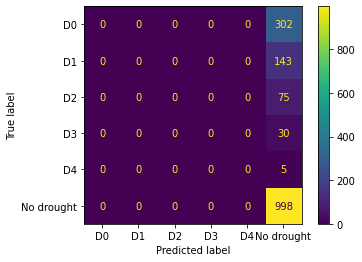

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = grid.predict(X_test)
cm = confusion_matrix(y_test, pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = grid.classes_).plot()

In [100]:
from sklearn import metrics, model_selection

In [101]:
# refitting the model on all our data

model = make_pipeline(preprocessor, LogisticRegression(C = 0.001))
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'lat', 'lon', 'elevation', 'SQ1', 'SQ2'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('logisticregression', LogisticRegression(C=0.00

In [102]:
from joblib import dump

In [103]:
# serialize our model to our harddrive for future use

dump(model, "drought_model.joblib")

['drought_model.joblib']